In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_dataset = torchvision.datasets.MNIST(
root = './data',
train = True,
download = True,
transform = transforms.Compose([
     transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
)
test_dataset = torchvision.datasets.MNIST(
root = './data',
train = False,
download = True,
transform = transforms.Compose([
     transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
)
len(train_dataset),len(test_dataset)

100%|██████████| 9912422/9912422 [00:00<00:00, 89147290.99it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 57848946.43it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 23456262.66it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10347924.37it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



(60000, 10000)

In [3]:
class LeNet5(nn.Module):

    def __init__(self):

        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size = 5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size = 2),
            nn.Conv2d(6, 16, kernel_size = 5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size = 2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, 10)
        )



    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        logit = self.classifier(x)
        return logit


In [4]:
def train(model, optimizer, loss_func, train_loader):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 300 == 0:
            print('Train Batch: {} Loss: {:.6f}'.format(
                batch_idx, loss.item()))

def test(model, loss_func, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.inference_mode():
        for data, target in test_loader:
            output = model(data)
            test_loss += loss_func(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100.0 * correct / len(test_loader.dataset)

    print('Test Loss: {:.6f}, Accuracy: {}/{} ({:.2f}%)'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))

def train_and_test(model, optimizer, loss_func, train_loader, test_loader, epochs):
    for epoch in range(1, epochs + 1):
        print('Epoch {}/{}'.format(epoch, epochs))
        train(model, optimizer, loss_func, train_loader)
        test(model, loss_func, test_loader)
        exp_lr_scheduler.step()

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=70, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [5]:
model_2 = LeNet5()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7.349, gamma=0.11)
train_and_test(model_2, optimizer, loss_func, train_loader, test_loader, epochs=10)

Epoch 1/10
Train Batch: 0 Loss: 2.306507
Train Batch: 300 Loss: 0.153604
Train Batch: 600 Loss: 0.069657
Test Loss: 0.000068, Accuracy: 9779/10000 (97.79%)
Epoch 2/10
Train Batch: 0 Loss: 0.080093
Train Batch: 300 Loss: 0.213603
Train Batch: 600 Loss: 0.049751
Test Loss: 0.000053, Accuracy: 9836/10000 (98.36%)
Epoch 3/10
Train Batch: 0 Loss: 0.027483
Train Batch: 300 Loss: 0.017824
Train Batch: 600 Loss: 0.082558
Test Loss: 0.000044, Accuracy: 9860/10000 (98.60%)
Epoch 4/10
Train Batch: 0 Loss: 0.014229
Train Batch: 300 Loss: 0.022154
Train Batch: 600 Loss: 0.014143
Test Loss: 0.000048, Accuracy: 9842/10000 (98.42%)
Epoch 5/10
Train Batch: 0 Loss: 0.014594
Train Batch: 300 Loss: 0.035139
Train Batch: 600 Loss: 0.003063
Test Loss: 0.000039, Accuracy: 9868/10000 (98.68%)
Epoch 6/10
Train Batch: 0 Loss: 0.063093
Train Batch: 300 Loss: 0.002056
Train Batch: 600 Loss: 0.059471
Test Loss: 0.000041, Accuracy: 9874/10000 (98.74%)
Epoch 7/10
Train Batch: 0 Loss: 0.065169
Train Batch: 300 Loss: 

torch.Size([32, 32])

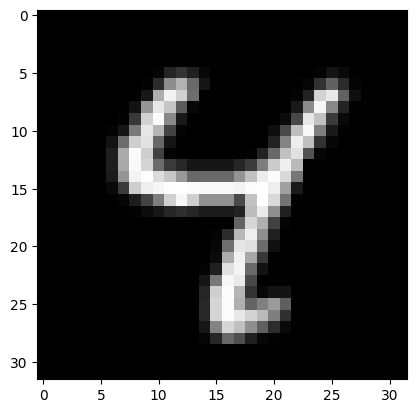

In [9]:
image_1 = test_dataset[6][0]
plt.imshow(image_1[0],cmap='gray')
image_1[0].shape

In [7]:
final_pred = int(torch.argmax(F.softmax(model_2(image_1.unsqueeze(dim=0)))).to(int))
final_pred

<ipython-input-7-24cb619f7678>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  final_pred = int(torch.argmax(F.softmax(model_2(image_1.unsqueeze(dim=0)))).to(int))


4

In [11]:
new_img = image_1.unsqueeze(dim=0)
new_img.shape

torch.Size([1, 1, 32, 32])